Source: __[Model zoo](https://github.com/rasbt/deep-learning-book/blob/38b332ca80258e70bb010280b847ecbc7574a640/code/model_zoo/image-data-chunking-npz.ipynb)__ in the deep learning book

In [4]:
import os
os.getcwd()

'/home/abhishek/Desktop/Projects/tf/yet_another_ML_tutorial/tensorflow_notebooks'

In [5]:
data_dir = '/home/abhishek/Desktop/Projects/tf/yet_another_ML_tutorial/mnist_data_sebastian_raschka'

In [7]:
# Note that executing the following code 
# cell will download the MNIST dataset
# and save all the 60,000 images as separate JPEG
# files. This might take a few minutes depending
# on your machine.

import numpy as np
from helper import mnist_export_to_jpg

np.random.seed(123)
mnist_export_to_jpg(path=data_dir)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz


In [12]:
import os
os.chdir(data_dir)

for i in ('train', 'valid', 'test'):
    print('mnist_%s subdirectories' % i, os.listdir('mnist_%s' % i))   
 

('mnist_train subdirectories', ['5', '4', '0', '3', '6', '9', '1', '7', '8', '2'])
('mnist_valid subdirectories', ['5', '4', '0', '3', '6', '9', '1', '7', '8', '2'])
('mnist_test subdirectories', ['5', '4', '0', '3', '6', '9', '1', '7', '8', '2'])


(28, 28)


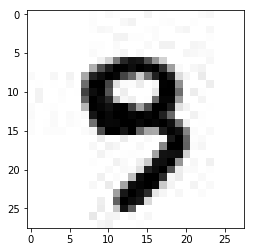

In [13]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

some_img = os.path.join('./mnist_train/9/', os.listdir('./mnist_train/9/')[0])

img = mpimg.imread(some_img)
print(img.shape)
plt.imshow(img, cmap='binary');

In [14]:
import numpy as np
import glob


def images_to_pickles(data_stempath='./mnist_', which_set='train', 
                      archive_size=5000, width=28, height=28, channels=1,
                      shuffle=False, seed=None):
    
    if not os.path.exists('%snpz' % data_stempath):
        os.mkdir('%snpz' % data_stempath)
        
    img_paths = [p for p in glob.iglob('%s%s/**/*.jpg' % 
                                   (data_stempath, which_set), recursive=True)]
    if shuffle:
        rgen = np.random.RandomState(seed)
        paths = rgen.shuffle(img_paths)
    
    idx, file_idx = 0, 1
    data = np.zeros((archive_size, height, width, channels), dtype=np.uint8)
    labels = np.zeros(archive_size, dtype=np.uint8)
    for path in img_paths:
        if idx >= archive_size - 1:
            idx = 0
            savepath = os.path.join('%snpz' % data_stempath, '%s_%d.npz' % 
                                    (which_set, file_idx))
            file_idx += 1
            np.savez(savepath, data=data, labels=labels)

        label = int(os.path.basename(os.path.dirname(path)))
        image = mpimg.imread(path)
        
        if len(image.shape) == 2:
            data[idx] = image[:, :, np.newaxis]
        labels[idx] = label
        idx += 1

In [15]:
images_to_pickles(which_set='train', shuffle=True, seed=1)
images_to_pickles(which_set='valid', shuffle=True, seed=1)
images_to_pickles(which_set='test', shuffle=True, seed=1)

TypeError: iglob() got an unexpected keyword argument 'recursive'